# Project Introduction:

In the new retailer situation(Big Data and AI embeded situation), suppliers and retailers have the urgent needs to know more about their goods shelfs, the channel between producter, retailers and consumber. Traditionally, suppliers pay slotting fees for retailers' shelf positions and have to hire the third survey companies to check executions. This glancing strategy costs a lots of money while provide valueless feedback. However, with the help of computer vision, we could provide more values than you could ever imagine. We could do on-time monitoring to provide info about occupancy rate, goods displayment, opponents' similar product analysis, inventory check, price check and etc.

part1: 

In the first part, we will detect and position sku(Stock Keeping Unit) in the goods shelf pictures(about alcohol). All data set are provided by the Bootcamp provider and we will later do ourself image collection and labelling to refine our training process.






Other application:
goods credit， bank load with inventory checking
make an inventory of goods in a warehouse

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# terminal instruction in colab
#!df -lh
#!apt install git
#

Filesystem      Size  Used Avail Use% Mounted on
overlay         226G   39G  188G  17% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.9G     0  5.9G   0% /dev/shm
tmpfs           6.4G   24K  6.4G   1% /var/colab
/dev/sda1       233G   40G  193G  18% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


download data

The data is availabel at the below link(provided by this bootcamp):
https://pinlandata.blob.core.windows.net/pinlan-data-hub/%E5%A4%96%E5%8C%85%E9%87%87%E9%9B%86/0524%E5%88%86%E7%B1%BB%E6%95%B0%E6%8D%AE%E9%9B%86/%E7%99%BD%E9%85%92%E5%88%86%E7%B1%BB%E6%95%B0%E6%8D%AE%E9%9B%860524.zip
And we coud cellect our own data for fine tuning later with labelImage tool.


In [ ]:
#downloaded data set summary
!wget https://pinlandata.blob.core.windows.net/pinlan-data-hub/%E5%A4%96%E5%8C%85%E9%87%87%E9%9B%86/0523%E6%A3%80%E6%B5%8B%E6%95%B0%E6%8D%AE/detdata_baijiu_train.zip

--2021-03-06 06:56:54--  https://pinlandata.blob.core.windows.net/pinlan-data-hub/%E5%A4%96%E5%8C%85%E9%87%87%E9%9B%86/0523%E6%A3%80%E6%B5%8B%E6%95%B0%E6%8D%AE/detdata_baijiu_train.zip
Resolving pinlandata.blob.core.windows.net (pinlandata.blob.core.windows.net)... 52.239.128.36
Connecting to pinlandata.blob.core.windows.net (pinlandata.blob.core.windows.net)|52.239.128.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220598056 (210M) [application/zip]
Saving to: ‘detdata_baijiu_train.zip’

detdata_baijiu_trai 100%[===================>] 210.38M  1.68MB/s    in 2m 20s  

2021-03-06 06:59:14 (1.51 MB/s) - ‘detdata_baijiu_train.zip’ saved [220598056/220598056]



In [ ]:
# splite data set
data_dir = 'drive/MyDrive/retailer_detect/data/alcohol'
result_model_path = 'drive/MyDrive/retailer_detect/models/'


import os
import subprocess

data_prep_command_line = ['python', 'drive/MyDrive/retailer_detect/data_prep/split_data.py', '--data_dir', data_dir, '--ratio', str(ratio),]
print('\nstart preprocessing')
process = subprocess.Popen(data_prep_command_line)
process.wait()
if process.returncode != 0:
    print(f"error，error code：{process.returncode}")
else:
    print('scuccessful')


start preprocessing
scuccessful


In [ ]:
# transfer to csv file from .xml labelling data
gen_csv_command_line = ['python', 'drive/MyDrive/retailer_detect/data_prep/gen_csv.py', '--data_dir', data_dir,]
print('\nstart preprocessing')
process = subprocess.Popen(gen_csv_command_line)
process.wait()
if process.returncode != 0:
    print(f"error，error code：{process.returncode}")
else:
    print('scuccessful')


start preprocessing
scuccessful


# Retina Network
Why we use retina network here?
Compared with FastRNN series and yolo series: 
1. retina network's calculation speed is higher than the others as one-stage algorithm. So it is suitable for industrial use. (it is a little bit slower than yolo.v3)
2. retina network has good performance with the help of focal loss, which solves the unbalanced data issue.(positive/negative and easy/hard)
3. retina network is suitbale to detect densely aranged objects
4. we can directly the keras retina network for our project

In [ ]:
# for keras retina network, packages dependency
!apt-get update
!apt-get install -y libsm6 libxext6 libxrender-dev
!pip install keras-resnet

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:13 https://developer.download.nvidia.com/compute/

In [ ]:
#open terminal
#following https://github.com/fizyr/keras-retinanet
#cd mydriver retain folder
#pip install .
#python3 setup.py build_ext --inplace
#

In [ ]:
import pandas as pd
df_train = pd.read_csv("drive/MyDrive/retailer_detect/data/alcohol/train_data.csv",engine ='python', encoding='utf-8',header=None)
df_test = pd.read_csv("drive/MyDrive/retailer_detect/data/alcohol/val_data.csv",engine ='python', encoding='utf-8', header=None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2)
plt.rcParams['font.sans-serif']=['SimHei'] #for showing chinese
df_train.columns=["image","x_min","y_min","x_max","y_max","label"]
df_test.columns=["image","x_min","y_min","x_max","y_max","label"]


In [ ]:
df_train.head()

image  x_min  y_min  x_max  y_max   label
0  白酒 - 25欧尚新星店_5342.JPG    272   1538    497   1993     bag
1  白酒 - 25欧尚新星店_5342.JPG    653    538    743    743  bottle
2  白酒 - 25欧尚新星店_5342.JPG   1162   3371   1284   3845  bottle
3  白酒 - 25欧尚新星店_5342.JPG   1317    922   1421   1084  bottle
4  白酒 - 25欧尚新星店_5342.JPG   1528    553   1628    724  bottle

In [ ]:
df_test.head()

image  x_min  y_min  x_max  y_max   label
0  白酒 - 23欧尚洪塘中路店_6291.JPG    999    927   1114   1304  bottle
1  白酒 - 23欧尚洪塘中路店_6291.JPG      1    278    157    699  bottle
2  白酒 - 23欧尚洪塘中路店_6291.JPG   2043   3233   2327   3532  others
3  白酒 - 23欧尚洪塘中路店_6291.JPG   1816   2063   1938   2570  bottle
4  白酒 - 23欧尚洪塘中路店_6291.JPG   1891   1441   2029   1912  bottle

Text(0.5, 0, 'class')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


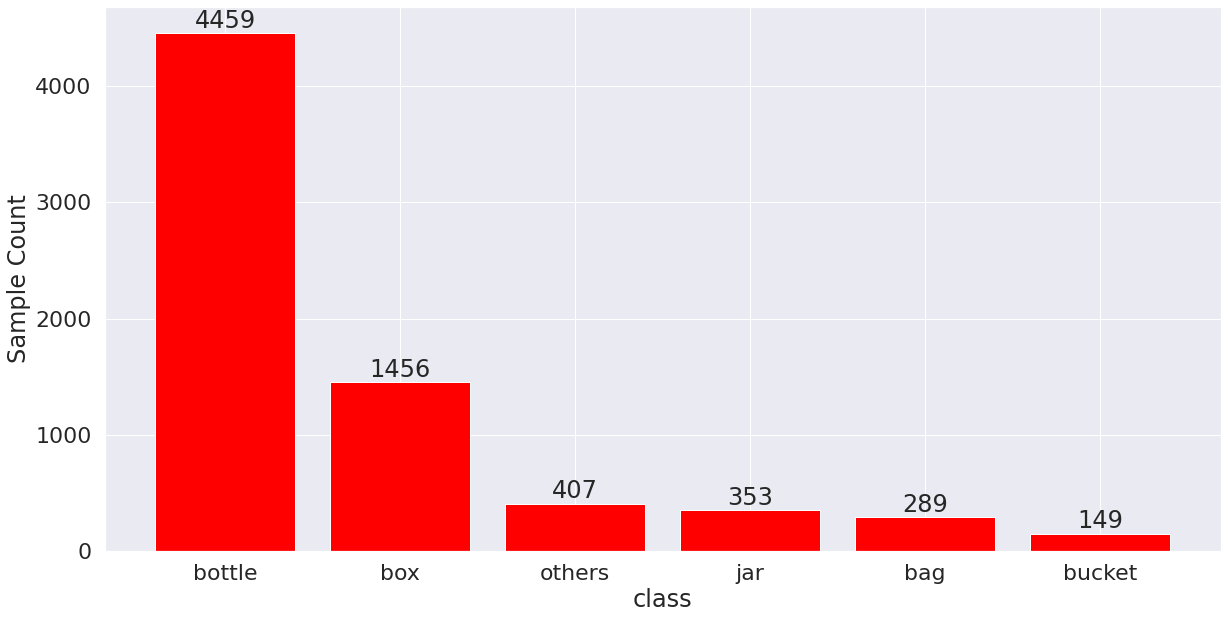

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
count_class = df_train['label'].value_counts()
plt.figure(figsize=(20,10))
class_bar = plt.bar(x=count_class.index, height=count_class.tolist(),width=0.8,color='red')
# plt.ylabel("Frequency")
# plt.title("Frequency of Char <100")
for bar in class_bar:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height+1, str(height), ha="center", va="bottom")
plt.xticks(count_class.index)
plt.ylabel("Sample Count")
plt.xlabel("class")

In [ ]:
#update csv
# df_train.to_csv("drive/MyDrive/retailer_detect/data/alcohol/train_head.csv")
# df_test.to_csv("drive/MyDrive/retailer_detect/data/alcohol/val_head.csv")
#analysis
#import pandas_profiling as ppf
#ppf.ProfileReport(df_train)

<bound method DataFrame.info of                              image  x_min  y_min  x_max  y_max   label
0            白酒 - 25欧尚新星店_5342.JPG    272   1538    497   1993     bag
1            白酒 - 25欧尚新星店_5342.JPG    653    538    743    743  bottle
2            白酒 - 25欧尚新星店_5342.JPG   1162   3371   1284   3845  bottle
3            白酒 - 25欧尚新星店_5342.JPG   1317    922   1421   1084  bottle
4            白酒 - 25欧尚新星店_5342.JPG   1528    553   1628    724  bottle
...                            ...    ...    ...    ...    ...     ...
7108  白酒 - 15沃尔玛购物广场四明中路店_7118.JPG   3741     68   4018    636  bottle
7109  白酒 - 15沃尔玛购物广场四明中路店_7118.JPG    425   2230    819   2811  bucket
7110  白酒 - 15沃尔玛购物广场四明中路店_7118.JPG   2311     21   2513    592  bottle
7111  白酒 - 15沃尔玛购物广场四明中路店_7118.JPG    287     87    494    618  bottle
7112  白酒 - 15沃尔玛购物广场四明中路店_7118.JPG    496    835    755   1415     box

[7113 rows x 6 columns]>

In [ ]:
#train retina network
import os
import subprocess
data_dir = 'drive/MyDrive/retailer_detect/data/alcohol'
result_model_path = 'drive/MyDrive/retailer_detect/models/'

train_csv_path = os.path.join(data_dir, 'train_data.csv')
val_csv_path = os.path.join(data_dir, 'val_data.csv')
class_csv_path = os.path.join(data_dir, 'class.csv')
train_log_path = 'drive/MyDrive/retailer_detect/data/logs/train_info.txt'

if os.path.exists(train_log_path):
    os.remove(train_log_path)
    
train_log = open(train_log_path, 'a')

train_command_line = ['python', 'drive/MyDrive/retailer_detect/data/keras-retinanet-master/keras-retinanet-master/keras_retinanet/bin/train.py', '--snapshot-path', result_model_path, 'csv', train_csv_path, class_csv_path, '--val-annotations', val_csv_path]
print('\nstart preprocessing')
process = subprocess.Popen(train_command_line, stdout=train_log, stderr=train_log)
process.wait()
if process.returncode != 0:
    print(f"error，error code：{process.returncode}")
else:
    print('scuccessful')


start preprocessing
scuccessful


accuracy:

61 instances of class bag with average precision: 0.4131

321 instances of class bottle with average precision: 0.8467


41 instances of class jar with average precision: 0.5694

12 instances of class bucket with average precision: 0.1389

160 instances of class box with average precision: 0.6067

53 instances of class others with average precision: 0.4415

mAP: 0.5027


In keras-retina network, the training model is a little bit different from the inference model. And keras provide us a way to do the transformation.

In [ ]:
trained_model_path = 'drive/MyDrive/retailer_detect/models/resnet50_csv_50.h5'
inference_model_save_path = "drive/MyDrive/retailer_detect/inference/retinanet_inference.h5"

import subprocess
convert_command = ['python', 'drive/MyDrive/retailer_detect/data/keras-retinanet-master/keras-retinanet-master/keras_retinanet/bin/convert_model.py', '--no-class-specific-filter', trained_model_path, inference_model_save_path]
print('\nstart preprocessing')
process = subprocess.Popen(convert_command)
process.wait()
if process.returncode != 0:
    print(f"error，error code：{process.returncode}")
else:
    print('scuccessful')


start preprocessing
scuccessful


Inference and test

In [ ]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

!pip install keras_retinanet
# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# use this to change which GPU to use
gpu = 0

# set the modified tf session as backend in keras
setup_gpu(gpu)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
     |████████████████████████████████| 71kB 3.3MB/s 
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=163868 sha256=4ece131f5b26a786ae64b6d746746482eebc8bd5c4331edf1aa5f9863762c02b
  Stored in directory: /root/.cache/pip/wheels/79/1d/fc/496708301dbd84bc2faa258d24d82f39fe46d9701d52287373
Successfully built keras-retinanet
1 Physical GPUs, 1 Logical GPUs


In [ ]:
# transer 0-5 label to text label
import pandas as pd

df = pd.read_csv("drive/MyDrive/retailer_detect/data/alcohol/class.csv", header=None)
# load label to names mapping for visualization purposes
labels_to_names = df[0].values.tolist()

In [ ]:
df[0].values.tolist()

['bag', 'bottle', 'jar', 'bucket', 'box', 'others']

In [ ]:
model = models.load_model(inference_model_save_path, backbone_name='resnet50')

processing time:  0.07124543190002441


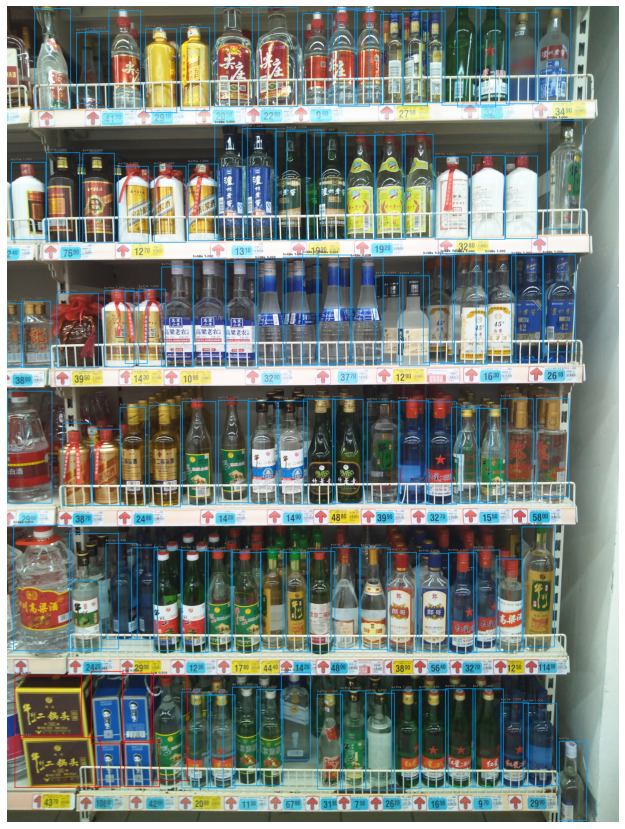

True

In [ ]:
# load image
image = read_image_bgr('drive/MyDrive/retailer_detect/test/test_1.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    """
    b = box.astype(int)        
    cropped = draw[b[1]:b[3], b[0]:b[2]]
    if cropped is not None:
        cv2.imwrite(f"drive/MyDrive/retailer_detect/test/{idx}.jpg", cropped) 
    """


plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

# 保存结果图
cv2.imwrite("drive/MyDrive/retailer_detect/test/test_1_result.jpg", draw)

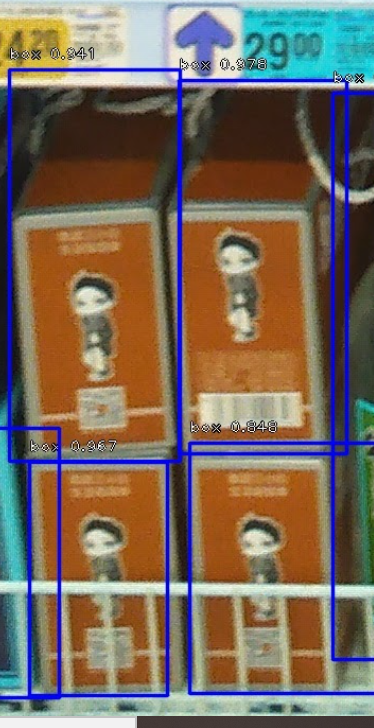

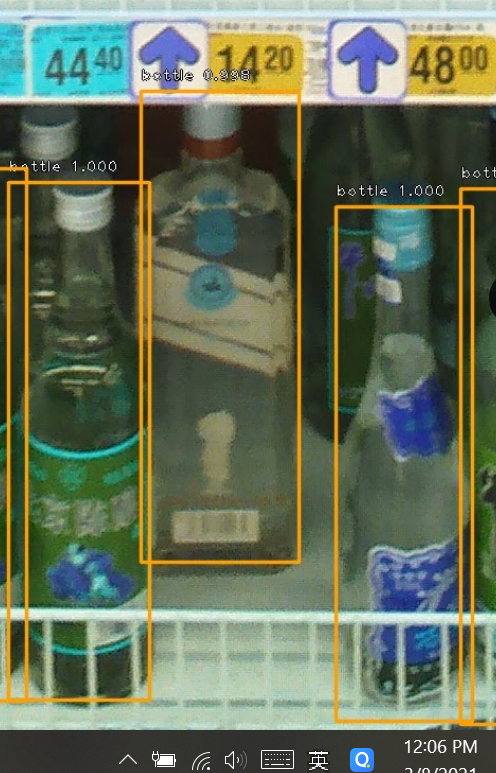

From the test, we can find that our trained model could label and allocate the goods with high confidence even some of them are not aranged in the front line.

Part 2:

In this part, we will do goods classification. After collecting cropped images in part 1, we need to recognize the detected goods. Here, we use alocohol data set which a part of RP2K data set.


RP2K DATASET:
LINK:
https://www.graviti.cn/open-datasets/RP2K

RP2K, a new large-scale retail product dataset for fine-grained image classification. Unlike previous datasets focusing on relatively few products, we collect more than 500,000 images of retail products on shelves belonging to 2000 different products. Our dataset aims to advance the research in retail object recognition, which has massive applications such as automatic shelf auditing and image-based product information retrieval.

Our dataset enjoys following properties: (1) It is by far the largest scale dataset in terms of product categories. (2) All images are captured manually in physical retail stores with natural lightings, matching the scenario of real applications. (3) We provide rich annotations to each object, including the sizes, shapes and flavors/scents. We believe our dataset could benefit both computer vision research and retail industry.

In [ ]:
!wget https://pinlandata.blob.core.windows.net/pinlan-data-hub/%E5%A4%96%E5%8C%85%E9%87%87%E9%9B%86/0524%E5%88%86%E7%B1%BB%E6%95%B0%E6%8D%AE%E9%9B%86/%E7%99%BD%E9%85%92%E5%88%86%E7%B1%BB%E6%95%B0%E6%8D%AE%E9%9B%860524.zip

--2021-03-08 19:14:37--  https://pinlandata.blob.core.windows.net/pinlan-data-hub/%E5%A4%96%E5%8C%85%E9%87%87%E9%9B%86/0524%E5%88%86%E7%B1%BB%E6%95%B0%E6%8D%AE%E9%9B%86/%E7%99%BD%E9%85%92%E5%88%86%E7%B1%BB%E6%95%B0%E6%8D%AE%E9%9B%860524.zip
Resolving pinlandata.blob.core.windows.net (pinlandata.blob.core.windows.net)... 52.239.128.36
Connecting to pinlandata.blob.core.windows.net (pinlandata.blob.core.windows.net)|52.239.128.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 232925795 (222M) [application/zip]
Saving to: ‘白酒分类数据集0524.zip’

白酒分类数据集0524. 100%[===================>] 222.13M  1.23MB/s    in 2m 46s  

2021-03-08 19:17:24 (1.34 MB/s) - ‘白酒分类数据集0524.zip’ saved [232925795/232925795]



In [ ]:
import os
import cv2
import random
import numpy as np
import shutil


class Dataset(object):
    def __init__(self, root_dir, train_ratio=0.9, target_num=500):
        """
        :param root_dir: dir_path
        :param train_ratio: splite_ratio
        :param target_num: min_number each class
        """
        self.root_dir = root_dir
        self.target_images_num = target_num

        # train,val path
        self.train_target = os.path.join(root_dir, "train")
        self.val_target = os.path.join(root_dir, "val")

        if os.path.exists(self.train_target):
            shutil.rmtree(self.train_target)

        if os.path.exists(self.val_target):
            shutil.rmtree(self.val_target)

        self.train_images = {}
        self.val_images = {}

        self.train_num = 0
        self.val_num = 0
        self.images_num = 0
        self.train_ratio = train_ratio

        self.class_list = list(
            filter(
                lambda x: not x.startswith(".")
                and os.path.isdir(os.path.join(self.root_dir, x)),
                os.listdir(self.root_dir),
            )
        )

        self.class_list.sort()

        os.makedirs(self.train_target)
        os.makedirs(self.val_target)

        self.class_index_list = []
        self.class_dict = {}
        for class_index, class_name in enumerate(self.class_list):
            self.class_dict[class_name] = class_index
            self.class_index_list.append(class_index)

        self.class_nums = len(self.class_list)

        for class_name in self.class_list:
            class_path = os.path.join(self.root_dir, class_name)
            images_list = list(
                filter(lambda x: not x.startswith("."), os.listdir(class_path))
            )

            self.images_num += len(images_list)

            train_samples = random.sample(
                images_list, int(len(images_list) * self.train_ratio)
            )
            val_samples = list(set(images_list) - set(train_samples))

            self.train_num += int(len(train_samples))
            self.val_num += int(len(val_samples))

            
            train_target_class_path = os.path.join(self.train_target, class_name)
            os.makedirs(train_target_class_path)

            val_target_class_path = os.path.join(self.val_target, class_name)
            os.makedirs(val_target_class_path)


            self.train_images[class_name] = []
            for image_name in train_samples:
                image_path = os.path.join(class_path, image_name)
                target_image_path = os.path.join(train_target_class_path, image_name)

                # copy important
                shutil.copyfile(image_path, target_image_path)
                self.train_images[class_name].append(target_image_path)


            self.val_images[class_name] = []
            for image_name in val_samples:
                image_path = os.path.join(class_path, image_name)
                target_image_path = os.path.join(val_target_class_path, image_name)

                # copy important
                shutil.copyfile(image_path, target_image_path)
                self.val_images[class_name].append(target_image_path)

In [ ]:
#run once
dataset_path = "drive/MyDrive/retailer_detect/classify/data/alcohol"
train_dataset_path = "drive/MyDrive/retailer_detect/classify/data/alcohol/train"
val_dataset_path = "drive/MyDrive/retailer_detect/classify/data/alcohol/val"

train_ratio = 0.9
data_loader = Dataset(dataset_path, train_ratio=train_ratio) 



class numbers：166


In [ ]:
dataset_path = "drive/MyDrive/retailer_detect/classify/data/alcohol"
train_dataset_path = "drive/MyDrive/retailer_detect/classify/data/alcohol/train"
val_dataset_path = "drive/MyDrive/retailer_detect/classify/data/alcohol/val"
import os
class_name = list(
    filter(
        lambda x: not x.startswith(".")
        and os.path.isdir(os.path.join(train_dataset_path, x)),
        os.listdir(train_dataset_path),
    )
)
print(f"class numbers：{len(class_name)}")

class numbers：166


 model selection:

here we use the pretrained resnet50 model provided by tensorflow.keras.applications import ResNet50. We will retrain some front layers of resnet50 and drop the last output layers.

In [ ]:

from tensorflow import keras as keras

import tensorflow as tf
import numpy as np

keras.backend.clear_session()  # For easy reset of notebook state.

gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.set_visible_devices(devices=gpus[0], device_type="GPU")
# input resnet50
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(include_top=False, weights='imagenet', classes=1000)
base_model.trainable = True
"""
include_top：是否保留顶层的全连接网络
weights：None代表随机初始化，即不加载预训练权重；'imagenet’代表加载预训练权重。
input_tensor：可填入Keras tensor作为模型的图像输出tensor
input_shape：可选，仅当include_top=False有效，应为长为3的tuple，指明输入图片的shape，图片的宽高必须大于197，如(200,200,3)
pooling：当include_top=False时，该参数指定了池化方式。None代表不池化，最后一个卷积层的输出为4D张量。‘avg’代表全局平均池化，‘max’代表全局最大值池化。
classes：可选，图片分类的类别数，仅当include_top=True并且不加载预训练权重时可用。
"""

"\ninclude_top：是否保留顶层的全连接网络\nweights：None代表随机初始化，即不加载预训练权重；'imagenet’代表加载预训练权重。\ninput_tensor：可填入Keras tensor作为模型的图像输出tensor\ninput_shape：可选，仅当include_top=False有效，应为长为3的tuple，指明输入图片的shape，图片的宽高必须大于197，如(200,200,3)\npooling：当include_top=False时，该参数指定了池化方式。None代表不池化，最后一个卷积层的输出为4D张量。‘avg’代表全局平均池化，‘max’代表全局最大值池化。\nclasses：可选，图片分类的类别数，仅当include_top=True并且不加载预训练权重时可用。\n"

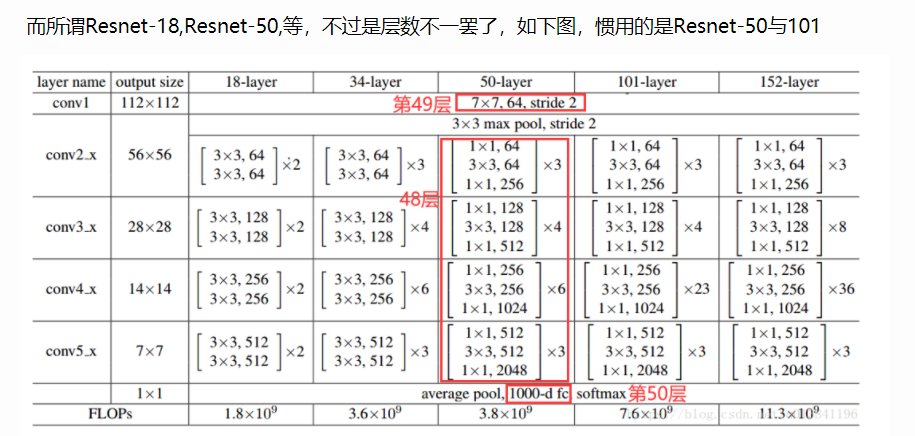

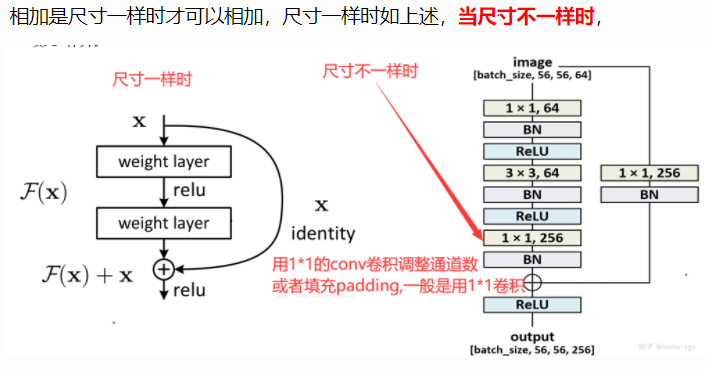

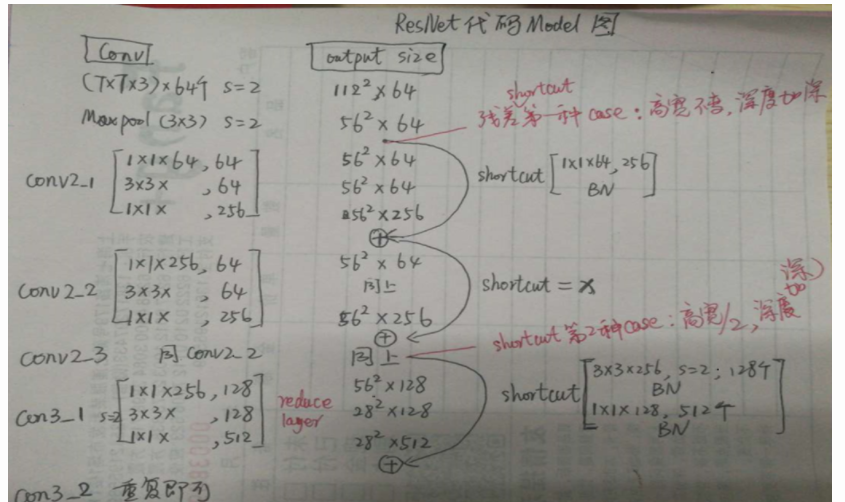

In [ ]:
#build output layers
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, GlobalMaxPooling2D, Flatten,Activation, concatenate,BatchNormalization
from tensorflow.keras import Model

x = base_model.output
avg_pool = GlobalAveragePooling2D()(x) 
max_pool = GlobalMaxPooling2D()(x)
x = concatenate([avg_pool, max_pool])
x = Flatten()(x)
x = Dense(1000)(x)
x = BatchNormalization()(x)
x = Activation(activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(500)(x)
x = BatchNormalization()(x)
x = Activation(activation="relu")(x)
y = Dense(len(class_name), activation="softmax")(x)

model_name = "ResNet50"
model = Model(inputs=base_model.input, outputs=y, name=model_name)

In [ ]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# training process

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image


train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        train_dataset_path,
        target_size=(224,224),
        classes=class_name,
        color_mode='rgb',
        batch_size=128,
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        val_dataset_path,
        target_size=(224,224),
        classes=class_name,
        color_mode='rgb',
        batch_size=128,
        class_mode='categorical')


from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
earlystop = EarlyStopping(monitor="val_accuracy", patience=50, verbose=1)
plateau = ReduceLROnPlateau(monitor="val_accuracy", 
                            verbose=1, 
                            mode='max', 
                            factor=0.1, 
                            patience=5)
  
checkpoint = ModelCheckpoint("drive/MyDrive/retailer_detect/classify/logs", 
                            monitor='val_accuracy',
                            verbose=2, 
                            save_best_only=True,
                            mode='max',
                            save_weights_only=True)

Found 7173 images belonging to 166 classes.
Found 871 images belonging to 166 classes.


In [ ]:
# train
history = model.fit(
        train_generator,
        epochs=20,
       # steps_per_epoch=100,
        validation_data=val_generator,
        #validation_steps=20,
        callbacks=[plateau,earlystop, checkpoint] )

Epoch 1/20
57/57 [==============================] - 33s 483ms/step - loss: 2.5976 - accuracy: 0.4962 - val_loss: 6.2369 - val_accuracy: 0.0494

Epoch 00001: val_accuracy improved from -inf to 0.04937, saving model to drive/MyDrive/retailer_detect/classify/logs
Epoch 2/20
57/57 [==============================] - 26s 456ms/step - loss: 0.5308 - accuracy: 0.8836 - val_loss: 5.2661 - val_accuracy: 0.0494

Epoch 00002: val_accuracy did not improve from 0.04937
Epoch 3/20
57/57 [==============================] - 25s 440ms/step - loss: 0.4269 - accuracy: 0.9026 - val_loss: 6.5184 - val_accuracy: 0.0023

Epoch 00003: val_accuracy did not improve from 0.04937
Epoch 4/20
57/57 [==============================] - 25s 442ms/step - loss: 0.1552 - accuracy: 0.9607 - val_loss: 6.8249 - val_accuracy: 0.0023

Epoch 00004: val_accuracy did not improve from 0.04937
Epoch 5/20
57/57 [==============================] - 25s 439ms/step - loss: 0.0820 - accuracy: 0.9803 - val_loss: 7.0595 - val_accuracy: 0.0092

In [ ]:
# evaluate
model.evaluate(
        val_generator,
        steps=10,
        verbose=1)

10/10 [==============================] - 3s 239ms/step - loss: 0.2647 - accuracy: 0.9346


[0.26466208696365356, 0.9345579743385315]

In [ ]:
#model save and load
model_path = "drive/MyDrive/retailer_detect/classify/model/ResNet50.h5"
model.save(model_path)

model = tf.keras.models.load_model(model_path)

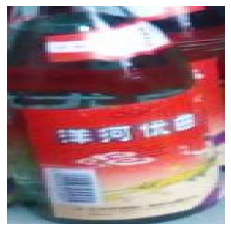

['洋河']


In [ ]:
#test
from matplotlib import pyplot as plt

def load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    
    img_tensor = np.expand_dims(img_tensor, axis=0)         
    img_tensor /= 255.                                      

    plt.imshow(img_tensor[0])                           
    plt.axis('off')
    plt.show()

    return img_tensor

img_path = 'drive/MyDrive/retailer_detect/classify/data/alcohol/val/洋河/1031_20965.jpg'
img_tensor = load_image(img_path)

pred = model.predict(img_tensor)

# print([[class_name[i], prob] for i, prob in enumerate(pred[0])])
print([class_name[np.argmax(prob)] for prob in pred])

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_image_list(test_dir):
    image_tensor_list = []    
    image_list = [os.path.join(test_dir, img_name) for img_name in os.listdir(test_dir)]
    for image_path in image_list:
        img = image.load_img(image_path, target_size=(224, 224))
        img_tensor = image.img_to_array(img)                    
        img_tensor = np.expand_dims(img_tensor, axis=0)         
        img_tensor /= 255.
        image_tensor_list.append(img_tensor.reshape(224,224,3))

    return np.asarray(image_tensor_list)

img_list = load_image_list("drive/MyDrive/retailer_detect/classify/data/alcohol/val/洋河/")
preds = model.predict_on_batch(img_list)
results = [class_name[np.argmax(prob)] for prob in preds]
print(results)

['洋河', '洋河', '牛栏山42.8度精品陈酿330ml', '牛栏山42.8度精品陈酿330ml', '洋河', '洋河', '洋河', '西凤酒', '洋河']


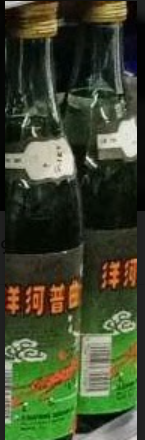

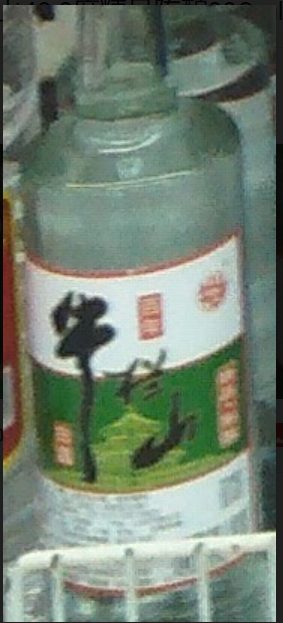

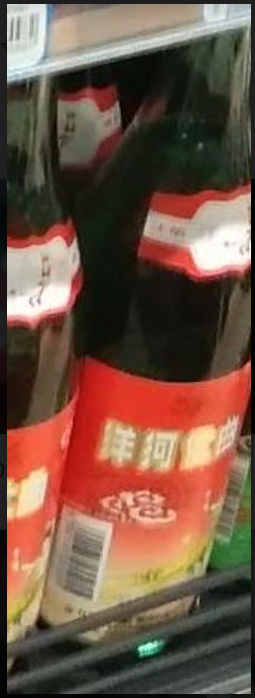

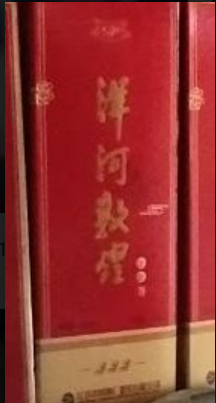

We could find that 牛栏山 and 洋河 have the same bottle color. To solve this, we could pay attention to bottle cap. Besides, the labeling has problems. There are three different types under the class 洋河。

In [ ]:
#top1 acc and top5 acc
top1_corrects = 0
top5_corrects = 0
total = 0

acc = {
    "class_name": class_name,
    "top1": [],
    "top5": [],
}

for idx, cls_name in enumerate(class_name):
    t1, t5 = 0, 0
    test_dir = f"{val_dataset_path}/{cls_name}"
    img_list = load_image_list(test_dir)
    if len(img_list) > 0:
        preds = model.predict_on_batch(img_list)
        total += len(preds)
        for pred in preds:          
            top_ids = pred.argsort()[-5:][::-1]
            if idx == top_ids[0]:
                top1_corrects += 1
                t1 += 1
            if idx in top_ids:
                top5_corrects += 1
                t5 += 1
    acc["top1"].append(t1/len(preds))
    acc["top5"].append(t5/len(preds))
                
print(f"Top-1 Acc: {top1_corrects/total}")
print(f"Top-5 Acc: {top5_corrects/total}")
print(f"Total testing images: {total}")

Top-1 Acc: 0.7841561423650976
Top-5 Acc: 0.9299655568312285
Total testing images: 871


part 3:

In this part, we will combine the first two part. Based on our trained models, we will to detect, allocate goods first and do classification later.

In [ ]:
# step 1
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

!pip install keras_retinanet
# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# use this to change which GPU to use
gpu = 0

# set the modified tf session as backend in keras
setup_gpu(gpu)



     |████████████████████████████████| 71kB 6.2MB/s 
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=163875 sha256=e6a2db4c715eaf102ae24d7dd6cba234589d83b48b905a6c797cd9ef486ec83e
  Stored in directory: /root/.cache/pip/wheels/79/1d/fc/496708301dbd84bc2faa258d24d82f39fe46d9701d52287373
Successfully built keras-retinanet
Physical devices cannot be modified after being initialized
1 Physical GPUs, 1 Logical GPUs


In [ ]:
# step 2
# transer 0-5 label to text label
import pandas as pd

df = pd.read_csv("drive/MyDrive/retailer_detect/data/alcohol/class.csv", header=None)
# load label to names mapping for visualization purposes
labels_to_names = df[0].values.tolist()

In [ ]:
# step 3
trained_model_path = 'drive/MyDrive/retailer_detect/models/resnet50_csv_50.h5'
inference_model_save_path = "drive/MyDrive/retailer_detect/inference/retinanet_inference.h5"

# import subprocess
# convert_command = ['python', 'drive/MyDrive/retailer_detect/data/keras-retinanet-master/keras-retinanet-master/keras_retinanet/bin/convert_model.py', '--no-class-specific-filter', trained_model_path, inference_model_save_path]
# print('\nstart preprocessing')
# process = subprocess.Popen(convert_command)
# process.wait()
# if process.returncode != 0:
#     print(f"error，error code：{process.returncode}")
# else:
#     print('scuccessful')


start preprocessing
scuccessful


In [ ]:
# step 4
detector = models.load_model(inference_model_save_path, backbone_name='resnet50')

In [ ]:
# step 5
import tensorflow as tf
classifier = tf.keras.models.load_model("drive/MyDrive/retailer_detect/classify/model/ResNet50.h5")

In [ ]:
# step 6
import os
class_name = list(
    filter(
        lambda x: not x.startswith(".")
        and os.path.isdir(os.path.join(train_dataset_path, x)),
        os.listdir(train_dataset_path),
    )
)
print(f"class numbers：{len(class_name)}")

with open("drive/MyDrive/retailer_detect/classify/data/ResNet50_classified_class.txt", "w+") as f:
    f.write(str(class_name))

with open("drive/MyDrive/retailer_detect/classify/data/ResNet50_classified_class.txt", "r+") as f:
    class_name = eval(f.read())

class numbers：166


In [ ]:
# step 7


def load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    
    img_tensor = np.expand_dims(img_tensor, axis=0)         
    img_tensor /= 255.                                      

    plt.imshow(img_tensor[0])                           
    plt.axis('off')
    plt.show()

    return img_tensor


from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

test_image_path = 'drive/MyDrive/retailer_detect/test/test_1.jpg'
test_dir = "drive/MyDrive/retailer_detect/test/"

input_image = read_image_bgr(test_image_path)

input_image = preprocess_image(input_image)
input_image, scale = resize_image(input_image)

start = time.time()

boxes, scores, labels = detector.predict_on_batch(np.expand_dims(input_image, axis=0))

boxes /= scale

draw = read_image_bgr(test_image_path).copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

idx = 0
predict_list = []

for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # filter
    if score < 0.5:
        continue
    
    # boarder color
    color = label_color(label)
    b = box.astype(int)
    
    # boarder
    cropped = draw[b[1]:b[3], b[0]:b[2]]
    if cropped is not None:
        image_path = f"drive/MyDrive/retailer_detect/classify/data/test/{idx}.jpg"
        # save sku
        cv2.imwrite(image_path, cropped)    
        # detect
        img_tensor = load_image(image_path)
        pred = classifier.predict(img_tensor)
        
        sku_id = np.argmax(pred)
        sku_name = class_name[sku_id]
        sku_score = np.max(pred)

        # classify
        predict_list.append(sku_name)
        
        print(f"{sku_id} {sku_name} {sku_score}")
       
        caption = "{} {:.3f}".format(sku_id, sku_score)
        draw_caption(draw, b, caption)
        draw_box(draw, b, color=label_color(sku_id))
    
        idx+=1
    
print("processing time: ", time.time() - start)
plt.figure(figsize=(25, 45))
plt.axis('off')
plt.imshow(draw)
plt.show()

Output hidden; open in https://colab.research.google.com to view.